# Advanced Risk Management – Assignment 2

**Deadline**:  14 March 2022, 18.00h.

| |Name |Student number|Email|
|:-|:----|:-------------|:----|
|1.| Zhuohang Li |  114205912      | zhuohang.li2@student.uva.nl    |


## Introduction
The file `data_AEX_FTSE.xlsx` contains daily log returns of the AEX and FTSE index returns for the period 5 January 2000 - 12 March 2020. The log return of asset $i$ on day $t$ is defined as $R_{i,t} = 100 \cdot \log(\frac{S_{i,t}}{S_{i,t-1}})$, with $S_{i,t}$ the price of asset $i$ on date $t$.

 In this assignment you are asked to calculate multi-period Value-at-Risk forecasts through Monte Carlo simulation (MCS). First, we obtain the VaR for the AEX index. Subsequently, we employ copula methods to obtain the VaR for a portfolio of two assets.

## Question 1: Load, clean, and model data [20 pts.]
First, install and import the relevant libraries:

In [1]:
#!pip install arch             # uncomment for installing the arch package
import numpy as np
import os
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns

Import the data in a DataFrame. The data is already transformed using methods that were used in Assignment 1 as well. Uncomment and adapt the lines necessary to mount the drive and change the path.

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
# path = '/content/drive/...'    # change path to your working directory
# os.chdir(path)

df = pd.read_excel('data_AEX_FTSE.xlsx') 
df = df.set_index(['Date']) # set 'Date' column as index

R_AEX = df['R_AEX']
R_FTSE = df['R_FTSE']

df.tail()

,R_AEX,R_FTSE
Date,,
2020-03-06,-3.967831,-3.689551
2020-03-09,-8.074168,-7.668863
2020-03-10,-1.059273,-0.240360
2020-03-11,-0.586694,-1.932034
2020-03-12,-10.638548,-10.136507


Suppose you are a risk manager and it is currently just after closing time of the trading day 12 March 2020, i.e. we are at the end of period $t=T$, with $T$ indicating 12 March 2020. You are asked to calculate the 10-day VaR on the AEX index, i.e. $VaR^p_{T+1:T+K}$, with horizon $K=10$ trading days. After some thought you decide to model the index with a GARCH model, and use Monte Carlo Simulation to obtain the 10-day VaR.

Estimate a GARCH(1,1) model, with constant mean return and standardized $t$ distributed shocks, for the AEX index returns. 

Plot the volatility series and analyze the shocks. Also obtain the one-day-ahead volatility forecast for 13 March 2021. Discuss your results. Can you attribute certain economic events to your observations for 12 March 2020?

Notes: 

* By specifying `dist = ` in the `arch_model` function we can change the distribution of the shocks. See the documentation at https://arch.readthedocs.io.
* GARCH model residuals can be obtain from the `.resid` attribute belonging to the fitted model (which is generated by the `.fit()` method). Conditional volatilities can be obtained similarly from the `.conditional_volatility` attribute. 
* The 1-day conditional variance forecast (note: variance instead of volatility) can be obtained as `x.forecast().variance['h.1']['2020-03-12']`, where `x` is the fitted model object, and the dates index refers to the date the forecast is made (so here we generate a forecast at the end of 12 March and forecast one-day ahead for the date 13 March.)

Iteration:      1,   Func. Count:      7,   Neg. LLF: 429355.5094369227
Iteration:      2,   Func. Count:     18,   Neg. LLF: 171196.14422281896
Iteration:      3,   Func. Count:     26,   Neg. LLF: 14185.864751908983
Iteration:      4,   Func. Count:     34,   Neg. LLF: 13014.748047720304
Iteration:      5,   Func. Count:     41,   Neg. LLF: 7553.150451141046
Iteration:      6,   Func. Count:     48,   Neg. LLF: 12896.834970170574
Iteration:      7,   Func. Count:     55,   Neg. LLF: 7515.056776652081
Iteration:      8,   Func. Count:     62,   Neg. LLF: 7511.913498937338
Iteration:      9,   Func. Count:     69,   Neg. LLF: 7511.1601893460775
Iteration:     10,   Func. Count:     75,   Neg. LLF: 7511.099164113428
Iteration:     11,   Func. Count:     81,   Neg. LLF: 7511.097961892613
Iteration:     12,   Func. Count:     87,   Neg. LLF: 7511.097801918042
Iteration:     13,   Func. Count:     93,   Neg. LLF: 7511.097799489227
Iteration:     14,   Func. Count:     98,   Neg. LLF: 7511.

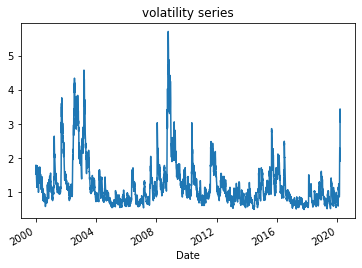

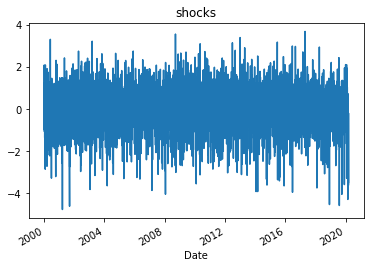

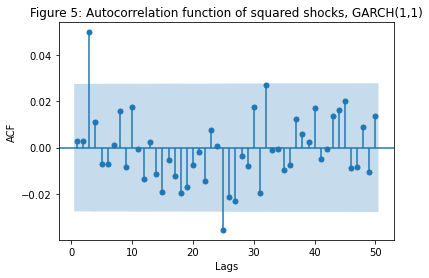

21.069755572745173


/Users/a32294/opt/anaconda3/lib/python3.8/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [3]:
# Estimating the volatility use GARCH Model with specifying standardized t distributed shocks
am=arch_model(R_AEX,dist='studentst')
res=am.fit()
print(res.summary())
#obtain conditional_volatility 
sig=res.conditional_volatility
#plot the volatility seires
sig.plot()
plt.title('volatility series')
plt.show()
#analyze the shocks
#1.check for the volatility clustering
z=res.resid
shock=z/sig
shock.plot()
plt.title('shocks')
plt.show()

# 2.Plot autocorrelation function of standardized residuals: to check whether some heteroscedasticity is still there
plot_acf(shock**2, lags=np.arange(1,51))
plt.title('Figure 5: Autocorrelation function of squared shocks, GARCH(1,1)')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()
#obtain the variance forecast
var=res.forecast().variance['h.1']['2020-03-12']
print(var)

Discussion of results:

1.According to the plot of volatility series, there exists a stylized fact called volaitility clustering, which is especially pronounced during systemic volatile period like 2008 financial crisis and COVID-19

2.According to the diagnostic check of shocks, neither volatility clustering nor significant autocorrelation appears, which make it convinced that GARCH(1,1) is sufficient

3.According to the GARCH model,the varience forecast for 2020.03.13 is strongly affected by the return or shocks on 2020.03.12. On that day, because of the huge impact of COVID on economy，the US market returns crashed, which display the largest drawdown in the histoty. As a result, the forecast of varience on March 13 is quite large due to the marcro economic impact.

## Question 2: Monte Carlo Simulation of 10-day ahead VaR [25 pts.]
We use Monte Carlo simulation to obtain the 10-day ahead Value-at-Risk forecast at $p=0.01$, 10-days ahead of 12 March 2020. 

A 'code skeleton' is included below, which you should complete. Implement steps A to F:

* A: Replace `x` with the fitted GARCH model object generated by the `.fit()` method in the previous question.
* B: For date $T+k$, $k=1$ we know the conditional variance forecast. Replace `xx` with the value you obtained for 13 March 2020 in the previous question.
* C: For dates $T+k$, $k > 1$ we use the GARCH model specification. Replace `xxx` with the GARCH equation: $\sigma_{T+k}^2 = \omega + \alpha (\sigma_{T+k-1} z_{T+k-1})^2 + \beta \sigma_{T+k-1}^2$, using your estimated parameters (see Step A).
* D: Replace `xxxx` with the proper definition of the K-day holding return.
* E: Obtain the K-day Value-at-Risk forecast using the sample percentile: $VaR^p_{T+1:T+K} = -Percentile\bigl\{\{\check{R}_{i,T+1:T+K}\}_{i=1}^{MC},100p\bigr\}$, with $\{\check{R}_{i,T+1:T+K}\}_{i=1}^{MC}$ the simulated $K$-day returns. (Hint: use the `numpy` function `np.percentile`.)

Plot the histogram of $\{\check{R}_{i,T+1:T+K}\}_{i=1}^{MC}$, and estimate the skewness and excess kurtosis of the sample. Compare the MCS estimate of the 10-day VaR, with the 'square-root rule' VaR, $\sqrt{K} \, VaR^p_{T+1}$. Discuss your results. Can you give a reason why you find the specific ranking of VaR values?


In [4]:
MC = 10000 # amount of Monte Carlo replications
VaR_level = 0.01 # the Value-at-Risk parameter `p`

K= 10 # The parameter K determins the length of the holding period, so we obtain a K-day return

# Obtain the GARCH parameters from `x`, the fitted model object generated by the .fit() method in the previous question
#---! STEP A:
[mu,omega,alpha,beta,d1] = res.params
d1=res.params[4]
# initialize a (MC x 1) vector to store the cumulative returns generated in the MC Monte Carlo replications
sim_cumulative_returns = np.zeros([MC,1])

# simulate the shocks 
sim_shocks = np.sqrt((d1 - 2) / d1) * stats.t.rvs(d1, size=[K,MC]) 

for i in range(MC): # we enter the `for loop' of Monte Carlo replications. In each iteration we compute a 10-day ahead return
    
    # initialize a (K x 1) return vector which will be filled with simulated returns for dates t+1,...,t+K (the vector is refreshed every Monte Carlo iteration)
    sim_returns = np.zeros([K,1])
    
    # initialize a (K x 1) conditional variance vector (the vector is refreshed every Monte Carlo iteration)
    sim_condvariance = np.zeros([K,1])
    
    for k in range(K): # we now generate K consecutive returns by iterating the volatility process, and utilizing the random shock draws
        
        if k == 0: # note that Python indexes the first element in a loop or vector as '0'
            # on the first day of the holding period we can use the 1-day ahead GARCH volatility forecast
            #---! STEP B:
            sim_condvariance[k] = var
        elif k > 0: # for further days in the future we use the garch equation putting in the simulated shocks
            #---! STEP C:
            sim_condvariance[k] = omega+alpha*((np.sqrt(sim_condvariance[k-1])*sim_shocks[k-1,i])**2)+beta*sim_condvariance[k-1]        
        # calculate and save the simulated return
        sim_returns[k] = mu + np.sqrt(sim_condvariance[k]) * sim_shocks[k,i];    
        
    # estimate cumulative holding period return and save it as element 'i' in the (MC x 1) vector of sim_cumulative_returns
    #---! STEP D: 
    sim_cumulative_returns[i]= sim_returns.sum(axis=0)
            
# now we have simulated the cumulative returns for each of our Monte Carlo iterations we can estimate the Value-at-Risk using the sample percentile function
#---! Step E:
VaR=-np.percentile(sim_cumulative_returns,100*VaR_level)

#risk metric VaR
quantilie=np.sqrt((d1-2)/d1)*stats.t.ppf(0.01,d1,loc=0,scale=1)
VaR2= -np.sqrt(10)*(np.sqrt(var)*quantilie) # here var is the predicted variance in question 1

pd.DataFrame(data=[VaR,VaR2],index=['MCS VaR','Square-root rule VaR'],columns=[' '])

,
MCS VaR,35.090429
Square-root rule VaR,36.534802


/Users/a32294/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


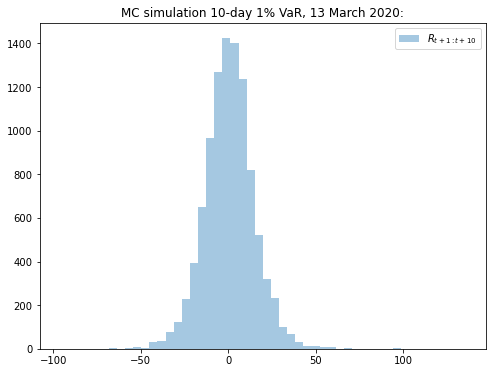

,
Kurtosis,2.532780
Skewness,0.140821


In [5]:
#plot the histogram
plt.figure(figsize=(8,6))
sns.distplot(sim_cumulative_returns,hist=True,kde=False)
plt.legend(['$R_{t+1:t+10}$'])
plt.title('MC simulation 10-day 1% VaR, 13 March 2020:')
plt.show()
# generate skewness and excess kurtosis
R_ku = pd.DataFrame(sim_cumulative_returns).kurtosis()
R_sc = pd.DataFrame(sim_cumulative_returns).skew()
pd.DataFrame(data=[R_ku.values,R_sc.values],index=['Kurtosis','Skewness'],columns=[''])

Discussion of results: 

1.It's clear that 'square-root rule' VaR is larger than the one simulated from Monte Carlo Simulation. The reason could be 'square-root rule' assume that volatility keep constant from t=T+1 to t=T+10, while in Monte Carlo Simulation, the volatility of this 10 days shrinks in fact.Because on 2020.3.12 the stocks on US market crashed, the forecast of volatlity on 2020.3.13 is largely impacted by the abnormal fluctuation. Therefore the VaR obtained from Monte Carlo Simulation is slightly smaller than the one generated from 'square-root rule'.
2.Besides, we can find that there exists positive skewness and positive excess kurtosis from the code above, which implied the fat-tail and more negative returns phenomenon, and it is consistent with the finance theory.

## Question 3: Copula [15 pts.]

Suppose we have estimated another GARCH model for the FTSE index returns. Once we have the shocks of both assets, we estimate a bivariate normal copula model, and find an estimate for the copula correlation parameter, $\hat{\rho} = 0.80$. We want to simulate standardized $t$-shocks for the AEX and FTSE index returns, with the dependence between shocks modelled by this normal copula.

Below we have included code that performs simulation from the normal copula. 

Explain in detail what steps A to D achieve. Also explain how the scatter plot created at the end of the code shows the difference in correlation between the two sets of shocks, as well as the difference in fat-tailedness.



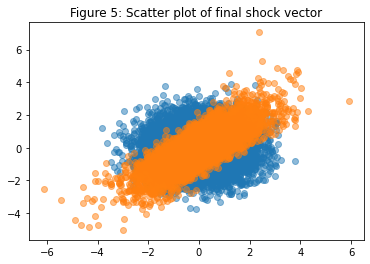

In [6]:
# simulate the copula shocks

copula_corr = 0.80 # the parameter rho
d_1 = d1; # degrees of freedom parameter for standardized t distribition of AEX shock 
d_2 = d1; # degrees of freedom parameter for standardized t distribition of FTSE shock

#---! STEP A:
sim_uncorrelated_normal_shocks = stats.norm.rvs(size=[K,MC,2]) # result is a (K x MC x 2) array

#---! STEP B:
sim_correlated_normal_shocks = np.zeros([K,MC,2])
sim_correlated_normal_shocks[:,:,0] = sim_uncorrelated_normal_shocks[:,:,0]
sim_correlated_normal_shocks[:,:,1] = copula_corr * sim_uncorrelated_normal_shocks[:,:,0] + np.sqrt(1 - copula_corr**2) * sim_uncorrelated_normal_shocks[:,:,1] 

#---! STEP C:
sim_normal_copula_shocks = stats.norm.cdf(sim_correlated_normal_shocks)

#---! STEP D: 
sim_new_shocks = np.zeros([K,MC,2])
sim_new_shocks[:,:,0] = np.sqrt((d_1 - 2) / d_1) * stats.t.ppf(sim_normal_copula_shocks[:,:,0],d_1) 
sim_new_shocks[:,:,1] = np.sqrt((d_2 - 2) / d_2) * stats.t.ppf(sim_normal_copula_shocks[:,:,1],d_2) 

# create a scatter plot for MC shock vector draws
plt.title('Figure 4: Scatter plot of uncorrelated normal vector draws')
plt.scatter(sim_uncorrelated_normal_shocks[1,:,0], sim_uncorrelated_normal_shocks[1,:,1], alpha=0.5)

plt.title('Figure 5: Scatter plot of final shock vector')
plt.scatter(sim_new_shocks[1,:,0], sim_new_shocks[1,:,1], alpha=0.5)

Discussion of results:

1.
StepA:

Construct an array （K,MC,2), produces a two-set random shocks(N(0,1)distribute) in which the first and the second column of are unrelated;K is days, MC is the amount of Monte Carlo replications, 2 represents we make 2  random data columns that there are independent from each other. So here we generated a three-dimension array with standard normal distribution draws as values.

StepB: 

Firstly, We generates a zero array with size (K,MC,2),which should be the same size of step A, only difference is now numbers are all zero in this array which will be filled later;

Secondly, we assigns the value of the frist column we made of stepA to the first column in this stepB array ; 

Finanlly, we use the second column generated by stepA times the copula correlation parameter to produce correlated shocks and followed by adding unrelated shocks times the sqaure root of (1 - copula correlation**2) at the same time. Generally this step we make it starts to be correlated.

StepC: 

We use the cumulative distribution function(CDF)(stat.normal) to obtain normal copula shocks.

StepD: 
The key of this step is to transfrom the normal correlated shocks to standized_t copula shocks.

Firstly,We generates a zero array with size (K,MC,2) again just like what we did in stepB; 

Secondly,Asign the freedom parameter for standardized t distribition of AEX shock(d1) and FTFE shock(d2) with normal copula shocks  from stepC and mutiply with the results in step c by using the inverse function (stats.t.ppf).By doing so，we successfully get the standard t coupla shocks by using the normal coupla shocks in step C.


Finally, we asign standardized 𝑡 -shocks for the AEX index returns to the first colum of new shock ,asign standardized 𝑡 -shocks for the FTSE index returnsto the second colum of new shock 



2.
Difference in correlation and fat-tailness :

In figure4,blue represent uncorrelated shock from step A,they are two set of independent data,set alpha =0.5

Here, K=1,It describe in one day, the relationship of these two set of independent data. As showed, the distribution is random all over, with pure randome trend and less tailness.


In figure5, it is new shock scatter plot which we simulate standardized t coupla shocks by analyzing t-distribution of AEX and FTFE index return, with the dependence between shocks modelled by this  copula 

it generally Orange represent correlated new shock,blue represent uncorrelated new shock.


Orange has a significant linear correlation and a more obvious fat-tailness since Orange spots are more likely to be found outside of central clusters.While  blue has no significant correlation and fat-tailness 

#### Question 4: MCS of an equal-weighted portfolio return [ 10 pts.]

Adapt your MCS with the simulation scheme for the copula shocks above to obtain 10-day VaR forecasts for an equal-weighted portfolio in the AEX and FTSE indices, i.e. we create a portfolio of both assets with portfolio weights $w_1=w_2=0.5$. To circumvent further estimation, you may assume that the GARCH model parameters (including the degrees of freedom) for the AEX and FTSE returns are equal, that the conditional volatility $\sigma_{t+1}$ is equal between assets, and take copula parameter $\rho = 0.8$. 

How do your VaR estimates change when $\rho$ is decreased? Given what you know of log returns and simple returns, how would you compute the simple portfolio returns `sim_cumulative_returns[i]` if our index returns, `R_AEX` and `R_FTSE`, are log returns?

In [7]:
MC = 10000 # amount of Monte Carlo replications
VaR_level = 0.01 # the Value-at-Risk parameter `p`
copula_corr = 0.8 # copula_correlation

K= 10 # The parameter K determins the length of the holding period, so we obtain a 10-day return

[mu,omega,alpha,beta,d1] = res.params # Here assume that both AEX and FTSE share the same GARCH model parameters

# initialize two (MC x 1) vectors to store the cumulative returns generated in the MC Monte Carlo replications
sim_cumulative_returns = np.zeros([MC,1]) # for AEX index
sim_cumulative_returns2 = np.zeros([MC,1])# For FTSE index
portfolio = np.zeros([MC,1]) # The final equailly weighted portfolio

# simulate the shocks 
d_1 = d1; # degrees of freedom parameter for standardized t distribition of AEX shock 
d_2 = d1; # degrees of freedom parameter for standardized t distribition of FTSE shock

#Simulated 2 correlated shocks and stored them in sim_correlated_normal_shocks vector
sim_uncorrelated_normal_shocks = stats.norm.rvs(size=[K,MC,2]) # result is a (K x MC x 2) array
sim_correlated_normal_shocks = np.zeros([K,MC,2])
sim_correlated_normal_shocks[:,:,0] = sim_uncorrelated_normal_shocks[:,:,0]
sim_correlated_normal_shocks[:,:,1] = copula_corr * sim_uncorrelated_normal_shocks[:,:,0] + np.sqrt(1 - copula_corr**2) * sim_uncorrelated_normal_shocks[:,:,1] 

#get the cumulative distribution function to produce normal corpula
sim_normal_copula_shocks = stats.norm.cdf(sim_correlated_normal_shocks)

# generates new shock to simulate standardized t-shock.By analyzing t-distribution of normal copula from step above.
sim_new_shocks = np.zeros([K,MC,2])
sim_new_shocks[:,:,0] = np.sqrt((d_1 - 2) / d_1) * stats.t.ppf(sim_normal_copula_shocks[:,:,0],d_1) 
sim_new_shocks[:,:,1] = np.sqrt((d_2 - 2) / d_2) * stats.t.ppf(sim_normal_copula_shocks[:,:,1],d_2) 

sim_shocks = sim_new_shocks


for i in range(MC): # we enter the `for loop' of Monte Carlo replications. In each iteration we compute a 10-day ahead return

    # initialize 2 (K x 1) return vectors which will be filled with simulated returns for dates t+1,...,t+K (the vector is refreshed every Monte Carlo iteration)
    sim_returns = np.zeros([K,1])
    sim_returns2 = np.zeros([K,1])

    # initialize 2 (K x 1) conditional variance vectors (the vector is refreshed every Monte Carlo iteration)
    sim_condvariance = np.zeros([K,1])
    sim_condvariance2 = np.zeros([K,1])

    for k in range(K): # we now generate K consecutive returns by iterating the volatility process, and utilizing the random shock draws

        if k == 0:
            # on the first day of the holding period we can use the 1-day ahead GARCH volatility forecast
            sim_condvariance[k] = var 
            sim_condvariance2[k] = var
        elif k > 0: # for further days in the future we use the garch equation putting in the simulated shocks
            #---! STEP C:
            sim_condvariance[k] = omega+alpha*((np.sqrt(sim_condvariance[k-1])*sim_shocks[k-1,i,0]))**2+beta*sim_condvariance[k-1]     
            sim_condvariance2[k] = omega+alpha*((np.sqrt(sim_condvariance2[k-1])*sim_shocks[k-1,i,1]))**2+beta*sim_condvariance2[k-1]        
        # calculate and save the simulated return
        sim_returns[k] = mu + np.sqrt(sim_condvariance[k]) * sim_shocks[k,i,0];  
        sim_returns2[k] = mu + np.sqrt(sim_condvariance2[k]) * sim_shocks[k,i,1];

    # estimate cumulative holding period return and save it as element 'i' in the (MC x 1) vector of sim_cumulative_returns
    #---! STEP D: 
    sim_cumulative_returns[i]= sim_returns.sum(axis=0)
    sim_cumulative_returns2[i]= sim_returns2.sum(axis=0)
    # get the equal-weighted portfolio return
    portfolio[i] = 0.5*(sim_cumulative_returns[i] + sim_cumulative_returns2[i])        
# now we have simulated the cumulative returns for each of our Monte Carlo iterations we can estimate the Value-at-Risk using the sample percentile function

VaR= - np.percentile(portfolio,100 * VaR_level)
print("Equal-weighted portfolio's VaR in %:",VaR)

Equal-weighted portfolio's VaR in %: 32.982885990490324


In [8]:
def get_VaR(copula_corr=0.80):
    # input setting
    MC = 10000 # amount of Monte Carlo replications
    VaR_level= 0.01 # the Value-at-Risk parameter `p`
    K= 10 # The parameter K determins the length of the holding period, so we obtain a 10-day return
    [mu,omega,alpha,beta,d1] = res.params # Here assume that both AEX and FTSE share the same GARCH model parameters

    # initialize two (MC x 1) vectors to store the cumulative returns generated in the MC Monte Carlo replications
    sim_cumulative_returns = np.zeros([MC,1]) # for AEX index
    sim_cumulative_returns2 = np.zeros([MC,1])# For FTSE index
    portfolio = np.zeros([MC,1]) # The final equailly weighted portfolio
    # simulate the shocks 
    d_1 = d1; # degrees of freedom parameter for standardized t distribition of AEX shock 
    d_2 = d1; # degrees of freedom parameter for standardized t distribition of FTSE shock

    #Simulated 2 correlated shocks and stored them in sim_correlated_normal_shocks vector
    sim_uncorrelated_normal_shocks = stats.norm.rvs(size=[K,MC,2]) # result is a (K x MC x 2) array
    sim_correlated_normal_shocks = np.zeros([K,MC,2])
    sim_correlated_normal_shocks[:,:,0] = sim_uncorrelated_normal_shocks[:,:,0]
    sim_correlated_normal_shocks[:,:,1] = copula_corr * sim_uncorrelated_normal_shocks[:,:,0] + np.sqrt(1 - copula_corr**2) * sim_uncorrelated_normal_shocks[:,:,1] 

    #get the cumulative distribution function to produce normal corpula
    sim_normal_copula_shocks = stats.norm.cdf(sim_correlated_normal_shocks)

    # generates new shock to simulate standardized t-shock.By analyzing t-distribution of normal copula from step above.
    sim_new_shocks = np.zeros([K,MC,2])
    sim_new_shocks[:,:,0] = np.sqrt((d_1 - 2) / d_1) * stats.t.ppf(sim_normal_copula_shocks[:,:,0],d_1) 
    sim_new_shocks[:,:,1] = np.sqrt((d_2 - 2) / d_2) * stats.t.ppf(sim_normal_copula_shocks[:,:,1],d_2) 

    sim_shocks = sim_new_shocks


    for i in range(MC): # we enter the `for loop' of Monte Carlo replications. In each iteration we compute a 10-day ahead return

        # initialize 2 (K x 1) return vectors which will be filled with simulated returns for dates t+1,...,t+K (the vector is refreshed every Monte Carlo iteration)
        sim_returns = np.zeros([K,1])
        sim_returns2 = np.zeros([K,1])

        # initialize 2 (K x 1) conditional variance vectors (the vector is refreshed every Monte Carlo iteration)
        sim_condvariance = np.zeros([K,1])
        sim_condvariance2 = np.zeros([K,1])

        for k in range(K): # we now generate K consecutive returns by iterating the volatility process, and utilizing the random shock draws

            if k == 0:
                # on the first day of the holding period we can use the 1-day ahead GARCH volatility forecast
                sim_condvariance[k] = var 
                sim_condvariance2[k] = var
            elif k > 0: # for further days in the future we use the garch equation putting in the simulated shocks
                #---! STEP C:
                sim_condvariance[k] = omega+alpha*((np.sqrt(sim_condvariance[k-1])*sim_shocks[k-1,i,0]))**2+beta*sim_condvariance[k-1]     
                sim_condvariance2[k] = omega+alpha*((np.sqrt(sim_condvariance2[k-1])*sim_shocks[k-1,i,1]))**2+beta*sim_condvariance2[k-1]        
            # calculate and save the simulated return
            sim_returns[k] = mu + np.sqrt(sim_condvariance[k]) * sim_shocks[k,i,0];  
            sim_returns2[k] = mu + np.sqrt(sim_condvariance2[k]) * sim_shocks[k,i,1];

        # estimate cumulative holding period return and save it as element 'i' in the (MC x 1) vector of sim_cumulative_returns
        #---! STEP D: 
        sim_cumulative_returns[i]= sim_returns.sum(axis=0)
        sim_cumulative_returns2[i]= sim_returns2.sum(axis=0)
        # get the equal-weighted portfolio return
        portfolio[i] = 0.5*(sim_cumulative_returns[i] + sim_cumulative_returns2[i])        
    # now we have simulated the cumulative returns for each of our Monte Carlo iterations we can estimate the Value-at-Risk using the sample percentile function

    VaR= - np.percentile(portfolio,100 * VaR_level)
    return VaR
    
# find the relationship of Rho and VaR
VaR = {}
for i in np.linspace(1,0,10):# input 10 Rhos between 0 to 1
    VaR.update({i:get_VaR(i)})
    
a = pd.DataFrame(data=VaR.values(),index=VaR.keys(),columns=['VaR'])
a.index.name='Rho'
a

,VaR
Rho,
1.000000,35.418808
0.888889,35.277087
0.777778,33.104854
0.666667,31.318471
0.555556,31.192328
0.444444,29.424253
0.333333,27.527295
0.222222,27.148552
0.111111,24.792111


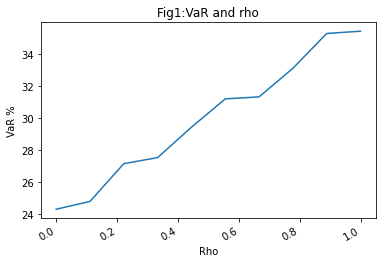

In [9]:
a.plot(title=['Fig1:VaR and rho'],subplots=True,legend=False,xlabel='Rho',ylabel='VaR %');

In [10]:
MC = 100 # amount of Monte Carlo replications
VaR_level = 0.01 # the Value-at-Risk parameter `p`
copula_corr=0.80

K= 10 # The parameter K determins the length of the holding period, so we obtain a K-day return

# Obtain the GARCH parameters from `x`, the fitted model object generated by the .fit() method in the previous question
#---! STEP A:
[mu,omega,alpha,beta,d1] = res.params

# initialize a (MC x 1) vector to store the cumulative returns generated in the MC Monte Carlo replications
sim_cumulative_returns = np.zeros([MC,1])
sim_cumulative_returns2 = np.zeros([MC,1])
portfolio = np.zeros([MC,1])


# simulate the shocks 
d_1 = d1; # degrees of freedom parameter for standardized t distribition of AEX shock 
d_2 = d1; # degrees of freedom parameter for standardized t distribition of FTSE shock


sim_uncorrelated_normal_shocks = stats.norm.rvs(size=[K,MC,2]) # result is a (K x MC x 2) array


sim_correlated_normal_shocks = np.zeros([K,MC,2])
sim_correlated_normal_shocks[:,:,0] = sim_uncorrelated_normal_shocks[:,:,0]
sim_correlated_normal_shocks[:,:,1] = copula_corr * sim_uncorrelated_normal_shocks[:,:,0] + np.sqrt(1 - copula_corr**2) * sim_uncorrelated_normal_shocks[:,:,1] 


sim_normal_copula_shocks = stats.norm.cdf(sim_correlated_normal_shocks)

 
sim_new_shocks = np.zeros([K,MC,2])
sim_new_shocks[:,:,0] = np.sqrt((d_1 - 2) / d_1) * stats.t.ppf(sim_normal_copula_shocks[:,:,0],d_1) 
sim_new_shocks[:,:,1] = np.sqrt((d_2 - 2) / d_2) * stats.t.ppf(sim_normal_copula_shocks[:,:,1],d_2) 

sim_shocks = sim_new_shocks


for i in range(MC): # we enter the `for loop' of Monte Carlo replications. In each iteration we compute a 10-day ahead return

    # initialize 2 (K x 1) return vectors which will be filled with simulated returns for dates t+1,...,t+K (the vector is refreshed every Monte Carlo iteration)
    sim_returns = np.zeros([K,1])
    sim_returns2 = np.zeros([K,1])

    # initialize 2 (K x 1) conditional variance vectors (the vector is refreshed every Monte Carlo iteration)
    sim_condvariance = np.zeros([K,1])
    sim_condvariance2 = np.zeros([K,1])

    for k in range(K): # we now generate K consecutive returns by iterating the volatility process, and utilizing the random shock draws

        if k == 0: # note that Python indexes the first element in a loop or vector as '0'
            # on the first day of the holding period we can use the 1-day ahead GARCH volatility forecast
            #---! STEP B:
            sim_condvariance[k] = var
            sim_condvariance2[k] = var
        elif k > 0: # for further days in the future we use the garch equation putting in the simulated shocks

            sim_condvariance[k] = omega+alpha*((np.sqrt(sim_condvariance[k-1])*sim_shocks[k-1,i,0]))**2+beta*sim_condvariance[k-1]     
            sim_condvariance2[k] = omega+alpha*((np.sqrt(sim_condvariance2[k-1])*sim_shocks[k-1,i,1]))**2+beta*sim_condvariance2[k-1]        
        # calculate and save the simulated return
        sim_returns[k] = mu + np.sqrt(sim_condvariance[k]) * sim_shocks[k,i,0];  
        sim_returns2[k] = mu + np.sqrt(sim_condvariance2[k]) * sim_shocks[k,i,1];

    #Here we converted log return to simple return by set exp(log return for holding period) - 1
    sim_cumulative_returns[i]= np.exp(sim_returns.sum(axis=0)/100) - 1 # Generated simple return in %
    sim_cumulative_returns2[i]= np.exp(sim_returns2.sum(axis=0)/100) - 1 # Generated simple return in %
    portfolio[i] = 0.5*(sim_cumulative_returns[i] + sim_cumulative_returns2[i])        
    # now we have simulated the cumulative returns for each of our Monte Carlo iterations we can estimate the Value-at-Risk using the sample percentile function

VaR= - np.percentile(portfolio,100 * VaR_level) * 100
VaR

22.71460450237795

Discussion of results:  

1.As fig1 shows,when Rho decreases, VaR in % is also decreases.

2.Given what I know of log returns and simple returns, to compute the simple portfolio returns sim_cumulative_returns[i] if our index returns, R_AEX and R_FTSE, are log returns we should use the formula: 

simple return = exp(log return) - 1